In [1]:
import numpy as np
import pandas as pd
from joblib import dump   # <--- AGREGA ESTA LÍNEA ARRIBA


In [19]:
datos=pd.read_csv("C:/Users/LENOVO/Desktop/CIENCIA DE DATOS/ENEI Esp. Ciencia de Datos/ProyFinalv1/RegLin1/datasets_56102_107707_monthly-beer-production-in-austr.csv")
print(datos.head())

     Month  Monthly beer production
0  1956-01                     93.2
1  1956-02                     96.0
2  1956-03                     95.2
3  1956-04                     77.1
4  1956-05                     70.9


In [20]:
import pandas as pd

# Cargar CSV con encabezado original
df = pd.read_csv(
    "C:/Users/LENOVO/Desktop/CIENCIA DE DATOS/ENEI Esp. Ciencia de Datos/ProyFinalv1/RegLin1/datasets_56102_107707_monthly-beer-production-in-austr.csv"
)

# Renombrar columnas
df.columns = ["Month", "BeerProduction"]

# Convertir fechas con formato correcto (YYYY-MM)
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")

# Usar índice y ordenar
df = df.set_index("Month").sort_index()

print(df.head())


            BeerProduction
Month                     
1956-01-01            93.2
1956-02-01            96.0
1956-03-01            95.2
1956-04-01            77.1
1956-05-01            70.9


            BeerProduction
Month                     
1956-01-01            93.2
1956-02-01            96.0
1956-03-01            95.2
1956-04-01            77.1
1956-05-01            70.9
            BeerProduction
Month                     
1995-04-01           127.0
1995-05-01           151.0
1995-06-01           130.0
1995-07-01           119.0
1995-08-01           153.0
Fold – MAE: 10.02, RMSE: 12.82, R2: 0.4315
Fold – MAE: 12.26, RMSE: 15.40, R2: 0.5046
Fold – MAE: 13.61, RMSE: 17.60, R2: 0.3216
Fold – MAE: 12.12, RMSE: 14.75, R2: 0.5284
Fold – MAE: 10.40, RMSE: 12.78, R2: 0.6450
=== Métricas promedio ===
MAE     11.682096
RMSE    14.668688
R2       0.486218
dtype: float64
Fold – MAE: 10.02, RMSE: 12.82, R2: 0.4315
Fold – MAE: 12.26, RMSE: 15.40, R2: 0.5046
Fold – MAE: 13.61, RMSE: 17.60, R2: 0.3216
Fold – MAE: 12.12, RMSE: 14.75, R2: 0.5284
Fold – MAE: 10.40, RMSE: 12.78, R2: 0.6450
✅ Modelo guardado como modelo_beer.joblib


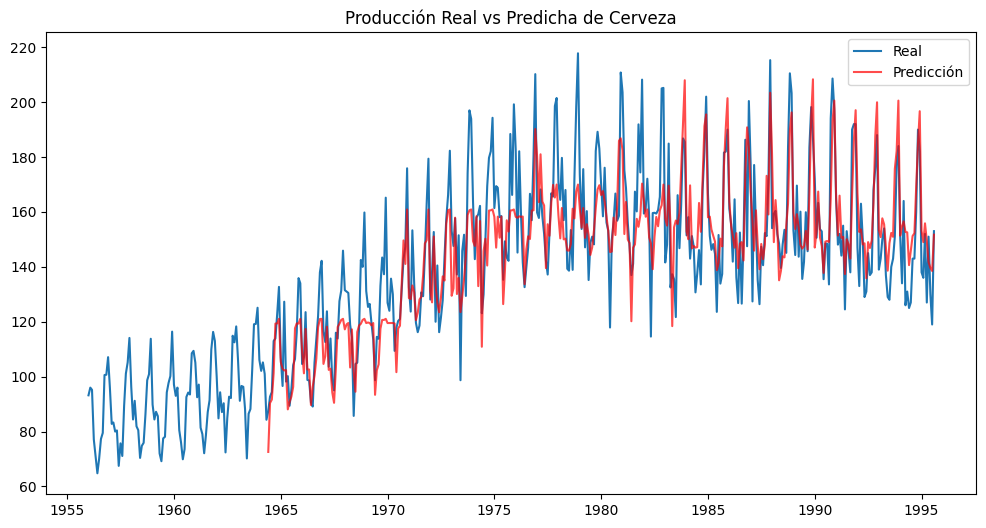

📂 Archivo 'beer_production_predictions.csv' guardado correctamente.


In [21]:
# ============================================
# 📌 Predicciones de producción mensual de cerveza (serie temporal)
# ============================================

# 1. Instalar/Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor


df = datos

# 3. Procesar fechas y ordenar
df.columns = ["Month", "BeerProduction"]
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
df = df.sort_index()

print(df.head())
print(df.tail())

# 4. Crear features de apoyo (lags, tendencia, estacionalidad)
def create_features(df, label=None):
    """
    Crea características de serie temporal: rezagos, mes, año, errores anteriores, etc.
    """
    df_feat = df.copy()
    df_feat['month'] = df_feat.index.month
    df_feat['year'] = df_feat.index.year
    # rezagos (lags)
    for lag in [1, 12, 24]:
        df_feat[f'lag_{lag}'] = df_feat["BeerProduction"].shift(lag)
    # diferencia
    df_feat["rolling_mean_12"] = df_feat["BeerProduction"].rolling(window=12).mean().shift(1)
    df_feat = df_feat.dropna()
    if label:
        X = df_feat.drop(columns=[label])
        y = df_feat[label]
        return X, y
    return df_feat

# 5. Crear X, y
X, y = create_features(df, label="BeerProduction")

# 6. División entrenamiento / prueba usando validación temporal
# Por ejemplo, usar los primeros datos hasta cierto año para entrenar, luego los últimos para probar
# Otra opción: TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

scores = []
predictions = []
real = []
# También guardamos un dataframe con predicciones
pred_df = pd.DataFrame(index=y.index)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.extend(y_pred)
    real.extend(y_test.values)
    pred_df.loc[y_test.index, "Predicted"] = y_pred
      # métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    scores.append({"MAE": mae, "RMSE": rmse, "R2": r2})
    print(f"Fold – MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")

# 7. Métricas promedio
scores_df = pd.DataFrame(scores)
print("=== Métricas promedio ===")
print(scores_df.mean())
    #------>

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # guardar predicciones
    predictions.extend(y_pred)
    real.extend(y_test.values)
    pred_df.loc[y_test.index, "Predicted"] = y_pred

    # métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    scores.append({"MAE": mae, "RMSE": rmse, "R2": r2})
    print(f"Fold – MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")

# 🚨 Aquí, después del último entrenamiento, guardas el modelo
dump(model, "modelo_beer.joblib")
print("✅ Modelo guardado como modelo_beer.joblib")


    #------>

    # guardar
   


  

# 8. Visualizar reales vs predichos
plt.figure(figsize=(12,6))
plt.plot(df.index, df["BeerProduction"], label="Real")
plt.plot(pred_df.index, pred_df["Predicted"], label="Predicción", color="red", alpha=0.7)
plt.legend()
plt.title("Producción Real vs Predicha de Cerveza")
plt.show()

# 9. Guardar CSV con predicciones (con % de error)

# Crear DataFrame con reales y predicciones
out_df = pd.DataFrame({
    "Date": pred_df.index,
    "Real": df.loc[pred_df.index, "BeerProduction"].values,
    "Predicted": pred_df["Predicted"].values
})

# Calcular error absoluto y % de error
out_df["Error"] = out_df["Real"] - out_df["Predicted"]
out_df["Error_%"] = (abs(out_df["Error"]) / out_df["Real"]) * 100  # porcentaje de error
out_df["Prediccion_%"] = 100 - out_df["Error_%"]  # porcentaje de acierto

# Guardar CSV final
out_df.to_csv("beer_production_predictions.csv", index=False)
print("📂 Archivo 'beer_production_predictions.csv' guardado correctamente.")




